26.3.24: Nächstes mal Zeit in Abschnitt 1 etwas straffen, evtl. Abschnitt 2 weiter kürzen.
"Higher Level Feautures" wie Asterisks und Klassen in einer späteren VL diskutieren, hier (v.a. zeitlich) too much.

26.3.25: Wie vorgeschlagen Inhalte entfernt, trotzdem kaum Zeit für Abschnitt 3 (nur ca 3 Min.), evtl. in VL03 schieben, dann anderweitig Tipps für die Übungen geben.

In [346]:
!jupyter nbconvert --to html VL02.ipynb --embed-images

[NbConvertApp] Converting notebook VL02.ipynb to html
[NbConvertApp] Writing 4727641 bytes to VL02.html


In [347]:
!jupyter nbconvert VL02.ipynb --to slides --embed-images

[NbConvertApp] Converting notebook VL02.ipynb to slides
[NbConvertApp] Writing 4727939 bytes to VL02.slides.html


In [344]:
!jupyter nbconvert VL02.ipynb  --to pdf

[NbConvertApp] Converting notebook VL02.ipynb to pdf
[NbConvertApp] Writing 222027 bytes to VL02.pdf


<img src="VL02_Material/piechart.jpg" width="80%" />

# <div style="color:blue;">1. Grundbegriffe Data Science / Data Analytics</div>
# <div>2. Python-Grundlagen</div>
# <div>3. Einfache Visualisierungen</div>

# 1. Grundbegriffe Data Science / Data Analytics

### 1.1 Das Data Science Venn-Diagramm

<img src="VL02_Material/venndiagramm_original.png" width="70%" />
<div class="tinyfont">http://drewconway.com/zia/2013/3/26/the-data-science-venn-diagram</div>

<img src="VL02_Material/venndiagramm_neu.png" width="70%" />

### 1.2 Daten

<img src="VL02_Material/datasphere.png" width="90%">
<div class="tinyfont">1 Zettabyte = 1024^4 GB = 1.099.511.627.776 GB</div>

**Definition:**
- (durch Beobachtungen, Messungen, statistische Erhebungen u. a. gewonnene) [Zahlen]werte,
- (auf Beobachtungen, Messungen, statistischen Erhebungen u. a. beruhende) Angaben, formulierbare Befunde,
- elektronisch gespeicherte Zeichen, Angaben, Informationen,
- zur Lösung oder Durchrechnung einer Aufgabe vorgegebene Zahlenwerte, Größen

*<div align="right">Duden</div>*  

Von Zeichen zu Wissen:
<img src="VL02_Material/datenpyramide.png" width="90%" />
<div class="tinyfont">Nach: F. Bodendorf: Daten- und Wissensmanagement. 2. Auflage, Springer Verlag, 2006, Abb. 1.1</div>
&nbsp;  

&nbsp;  

&nbsp;  

&nbsp;  

&nbsp;  

&nbsp;  


**Unterscheidungen:**

**Syntax** (=Regelsystem für Zeichen) vs.  
**Semantik** (=Bedeutung der Zeichen/Wörter im Kontext)

**Unstrukturierte Daten** (z.B. Video, Bild, Text) vs.  
**Strukturierte Daten** (z.B. Datenbank, xml, csv)

**Ungelabelte Daten** vs.  
**Gelabelte Daten** (Zielgrößen für eine  
Vorhersage sind vorhanden, diese nennt man *Ground Truth*)

### 1.3 Machine Learning: Grundbegriffe

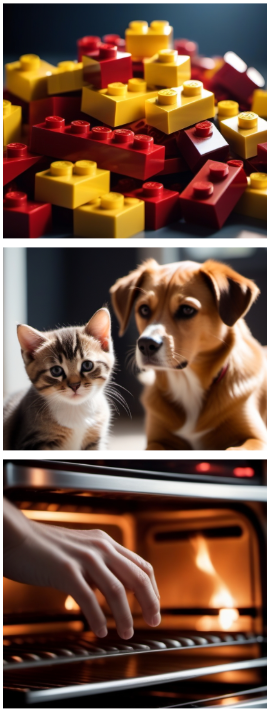

<span class="tinyfont">Images generated by Stable Diffusion</span>

**Unsupervised Learning**:
- keine Labels notwendig
- Clustering oder Dimensionsreduktion

&nbsp;

**Supervised Learning**:
- Labels sind notwendig
- **Regression** für kontinuierliche Zielgröße,  
  **Klassifikation** für diskrete Zielgröße

**Reinforcement Learning**:
- Training eines handlungsfähigen Agenten

**Beispieldatensatz** für die Anwendung von Unsupervised und Supervised Learning:

In [1]:
import pandas as pd # (pandas noch nicht in dieser VL)
df = pd.read_csv ( "VL02_Material/heart.csv" )

df # pandas DataFrame


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


Unsupervised Learning (Clustering):

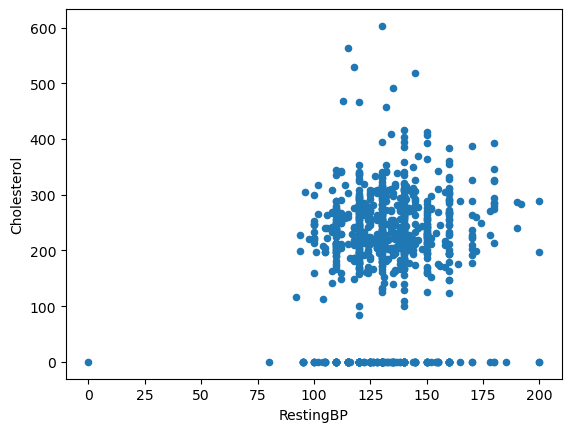

In [2]:
# Visualisiere zwei ausgewählte Spalten
# in einem sog. Scatterplot
df.plot.scatter(x="RestingBP",y="Cholesterol",
                cmap=None);







C:\Users\schirmef\Anaconda3\envs\ttz_base\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


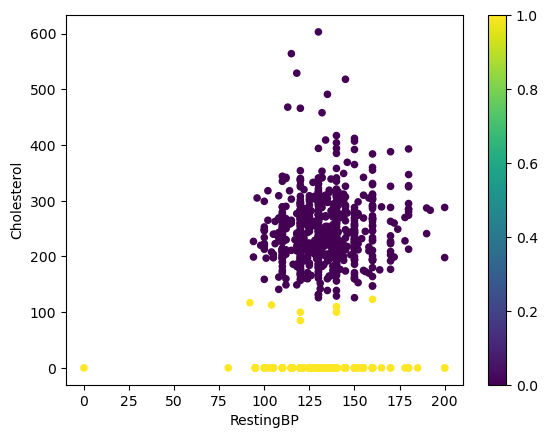

In [27]:
# Wende das sog. Kmeans-Clustering an
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,n_init=10)
kmeans.fit(df[["RestingBP","Cholesterol"]])

# Visualisiere erneut, nun mit Einfärbung
df.plot.scatter(x="RestingBP",y="Cholesterol",
                c=kmeans.labels_, cmap="viridis");


In [4]:
# Die Variable kmeans.labels_ wurde im Schritt kmeans.fit() gefüllt. Für jeden der 918 Patienten wird eine 0 oder 1
# gesetzt, je nachdem, welchem Cluster der Patient zugeordnet wird. Dieses Verfahren ist "unsupervised", weil keine
# a priori vorhandene Information, was denn die "wahren" Cluster sind, verwendet wird.
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,

Supervised Learning (Klassifikation):

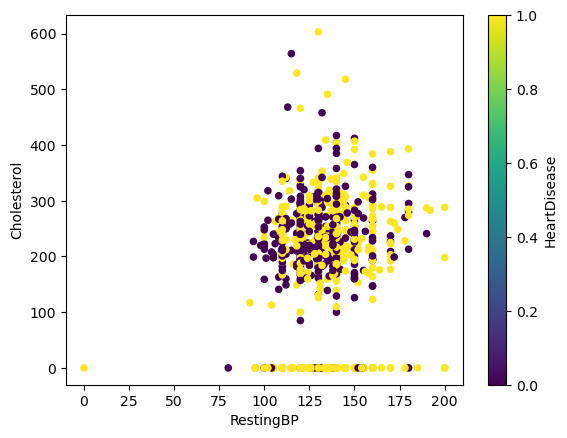

In [27]:
# Visualisiere zwei ausgewählte Spalten
# in einem sog. Scatterplot
df.plot.scatter(x="RestingBP",y="Cholesterol",
                c="HeartDisease", cmap="viridis");

# Hierbei wird mit c="HeartDisease" gemäß der
# Zielgröße "HeartDisease" eingefärbt.
#
# Diese Zielgröße nimmt nur den Wert 0 oder 1 an,
# daher spricht man von einer (binären)
# Klassifikation, die wir nachfolgend durchführen
# möchten.


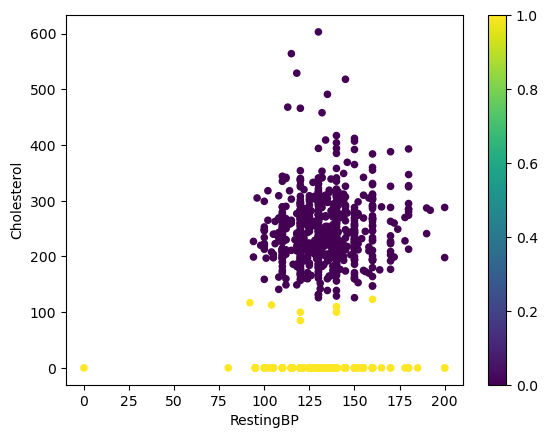

In [39]:
# Wende ein einfaches Klassifizierungsverfahren an
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=1)
clf.fit( X=df[["RestingBP","Cholesterol"]],
         y=df["HeartDisease"] )

# Visualisiere die Vorhersageregel auf den
# Trainingsdaten (sinnvoller wäre: auf neuen Daten)
predictions = clf.predict(
    df[["RestingBP","Cholesterol"]])
df.plot.scatter(x="RestingBP",y="Cholesterol",
                c=predictions, cmap="viridis");

Analyse der Klassifikation (d.h. der Entscheidungsregeln im Entscheidungsbaum):

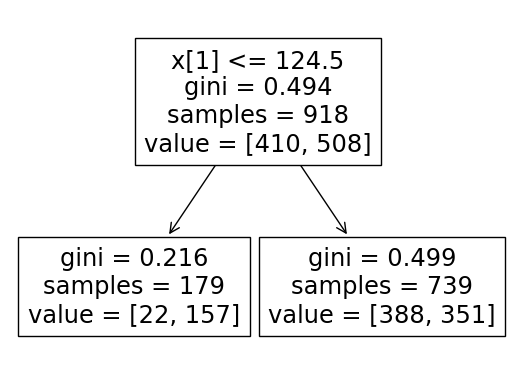

In [42]:
from sklearn import tree
clf = DecisionTreeClassifier(max_depth=1
                            ).fit(
  X=df[["RestingBP","Cholesterol"]],
  y=df["HeartDisease"])
tree.plot_tree(clf);

# Bei Feature 1 (=Cholesterol) wird beim
# Wert 124.5 gesplittet (links: x[1] <= 124.5).
# Linker Zweig ist "ja", rechter Zweig ist "nein".

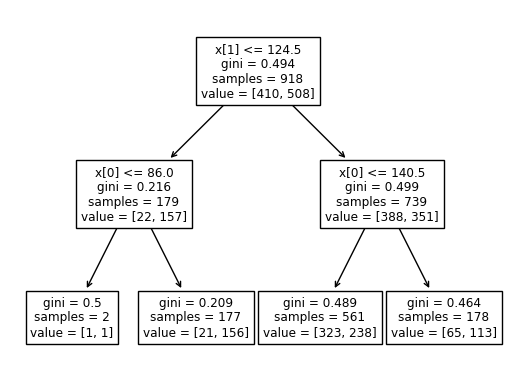

In [45]:
# Wiederhole den Fit, erlaube tiefere Bäume
clf = DecisionTreeClassifier(max_depth=2).fit(
 X=df[["RestingBP","Cholesterol"]],
 y=df["HeartDisease"])
tree.plot_tree(clf);

# Danach wird bei Feature 0 (=RestingBP) weiter
# gesplittet (später dazu mehr)

Erklärung der Zeilen in den Entscheidungsknoten im Baum:

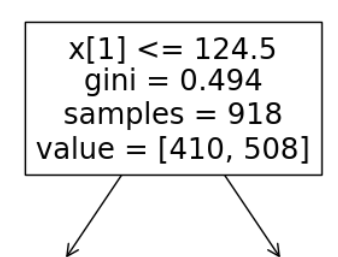

Zeile | Inhalt | Erklärung
---|---|---
1 | x[1] <= 124.5 | Entscheidungsregel: Patienten, für die "Feature 1" <= 124.5 ist, landen im linken Zweig, sonst im rechten.
2 | gini = 0.494 | Der Baumerzeugungsalgorithmus probiert alle möglichen Features und alle möglichen Split-Niveaus durch. Jede Split-Möglichkeit wird mit der *gini-Impurity* bewertet. Die Split-Möglichkeit mit dr niedrigsten gini-Impurity wird gewählt und der Algorithmus wird rekursiv in den Teilzweigen fortgesetzt.<br><br>Der gini-Wert gibt das Maß der Durchmischtheit an: Der gini-Wert ist hoch (0.5 bei binärer Klassifikation), wenn alle Klassen gleich häufig vertreten ist. Der gini-Wert ist 0, wenn die Teilpopulation zu 100% aus einer Klasse besteht. Es wird jeweils die Durchmischtheit in den beiden durch den Split entstehenden Teilmengen berechnet und ein gewichtetes Mittel gebildet.
3 | samples = 918 | Anzahl der Patienten in der aktuell betrachteten Teilmenge *vor* dem Split.
4 | value = [410, 508] | Die Anzahl der Patienten mit HeartDisease=0 bzw. HeartDisease=1 *vor* dem Split.

Eine Spalte vs. zwei Spalten:

In [17]:
# Zugriff auf eine Spalte;
# Ergebnis ist eine Pandas Series
df["RestingBP"]

0      140
1      160
2      130
3      138
4      150
      ... 
913    110
914    144
915    130
916    130
917    138
Name: RestingBP, Length: 918, dtype: int64

In [18]:
# Zugriff auf zwei Spalten;
# Ergebnis ist ein Pandas DataFrame
df[["RestingBP","Cholesterol"]]

,RestingBP,Cholesterol
0,140,289
1,160,180
2,130,283
3,138,214
4,150,195
...,...,...
913,110,264
914,144,193
915,130,131
916,130,236


### 1.4 Data Analytics: Das Gartner Analytics Ascendancy Model

<img src="VL02_Material/gartnermodel.png" width="95%" />
<div class="tinyfont">J. Finn, G. Troughton: Predictive Analytics for Healthcare, O'Reilly 2020</div>  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  

**1. Descriptive Analytics:** Daten Beschreiben, Hypothesen generieren

**2. Diagnostic Analytics:** Erklärungen finden, Hypothesen testen

**3. Predictive Analytics:** Vorhersagemodelle erstellen, Eintrittswahrscheinlichkeiten berechnen (Klassifikation/Regression)

**4. Prescriptive Analytics:** Das Gesamtsystem optimieren, Handlungen bewerten und Empfehlungen ableiten

<img src="VL02_Material/piechart.jpg" width="80%" />

# <div>1. Grundbegriffe Data Science / Data Analytics</div>
# <div style="color:blue;">2. Python-Grundlagen</div>
# <div>3. Einfache Visualisierungen</div>

# 2. Python-Grundlagen

<center><img src="VL02_Material/python_overview.png" width="80%"/></center>

**Tutorial:**

- Erstellt von Justin Johnson, Universität Stanford (Kurs cs231n)
- Angepasst als Jupyter Notebook von Volodymyr Kuleshov und Isaac Caswell (Kurs cs228)
- Erneute Anpassung von Kevin Zakka (Kurs cs231n)
- Anpassung für die HS Kempten von Michael Strobel im SoSe22
- Nochmalige Anpassung für diesen Kurs

Dieses Tutorial beinhaltet folgende Themen:

- Basic Python: Basic data types (Containers, Lists, Dictionaries, Sets, Tuples), Funktionen, Klassen
- IPython: Creating notebooks, Typical workflows


### 2.1 Grundlegende Datentypen: Strings
&nbsp;  
<center><img src="VL02_Material/xkcd_python.png" width="35%" /><div class="tinyfont">https://xkcd.com/353/</div></center>

In [16]:
hello = "HELLO"  # String Literale werden von einfachen oder doppelten Anführungszeichen umschlossen
world = 'WORLD'
print(hello, len(hello))


HELLO 5


In [54]:
hw = hello + "\n" + world  # String concatenation mit +
print(hw)


HELLO
WORLD


In [55]:
hello + 42 # Es können nur String-Objekte verbunden werden; hier wäre ein Cast zu String notwendig via str(42)


TypeError: can only concatenate str (not "int") to str

Verschiedene Möglichkeiten zum Formatieren von Strings, u.a.:
- "[printf-style String formatting](https://docs.python.org/3/library/stdtypes.html#printf-style-string-formatting)"
- .format (definiert in [PEP3101](https://peps.python.org/pep-3101/), seit Python 3.0)
- f-Strings (definiert in [PEP498](https://peps.python.org/pep-498/), seit Python 3.6)

In [31]:
# "printf-style String formatting"
"Hallo %s" % "Welt"


'Hallo Welt'

In [32]:
# ... mit mehreren Argumenten
"Hallo %s %d" % ("Welt", 123)


'Hallo Welt 123'

In [25]:
# PEP3101, seit Python 3.0:
# String-Formatierung mit .format
"{0} {1} {2:08d} {3:.3f}".format("Hallo",
                                 27, 28, 3.141592)


'Hallo 27 00000028 3.142'

In [26]:
# PEP498, seit Python 3.6:
# String-Formatierung mit f-Strings 
hw12 = f"{hello} {world:12} {12}"


HELLO WORLD        12


**String-Methoden** ([Dokumentation](https://docs.python.org/3.7/library/stdtypes.html#string-methods)) (geben eine Kopie des Strings zurück):

In [33]:
s = "hallo"
print(s.capitalize())           # Anfangsbuchstaben groß schreiben
print(s.upper())                # Konvertiert eine Zeichenkette in Großbuchstaben; printet "HELLO"
print(s.rjust(7))               # Eine Zeichenkette rechtsbündig ausrichten, mit Leerzeichen auffüllen
print(s.center(7))              # Eine Zeichenkette zentrieren, mit Leerzeichen auffüllen
print(s.replace("l", "(ell)"))  # Ersetze alle vorkommenden Teile einer Teilzeichenkette durch eine andere
print(" world ".strip())        # White Space (führend/nachfolgend) wird entfernt


Hallo
HALLO
  hallo
 hallo 
ha(ell)(ell)o
world


&nbsp;  
<center><img src="VL02_Material/dilbert.gif" / width="80%"></center>

**Konvertierung** (Type casting)

In [119]:
print(1.0+2)                         # automatischer Type Cast
print(2+True)                        # Konvention False=0, True=1
print(int("5"), type(int("5")))      # von String nach Int
print(float("5"), type(float("5")))  # von String nach Float
print("Hello " + str(5.5))           # von Float nach String


3.0
3
5 <class 'int'>
5.0 <class 'float'>
Hello 5.5


In [120]:
print("Hello" + 5)                   # keine implizite Konvertierung von Int nach String


TypeError: can only concatenate str (not "int") to str

### 2.2 Listen und Slicing

Eine [Liste](https://docs.python.org/3.7/tutorial/datastructures.html#more-on-lists) ist das Python-Äquivalent zu einem Array; sie kann verschiedene Typen enthalten und die Größe ändern.

<center><img src="VL02_Material/datadrill.png" width="40%" /></center>

Grundlegende Funktionalität der Liste:

In [80]:
L = [3, 1, 2]
print(len(L))                            # Länge der Liste
print(L[-1])                             # Negative Indizes zählen vom Ende der Liste
print(L[2] == L[len(L) - 1] == L[-1])    # Verschiedene Möglichkeiten, das gleiche Element zu extrahieren


3
2
True


In [81]:
L[2] = "foo"  # Listen können beliebige Typen enthalten
print(L)


[3, 1, 'foo']


In [82]:
L.append("bar")  # Anhängen an die Liste (Entfernen via .pop)
print(L)


[3, 1, 'foo', 'bar']


In [83]:
L + [97,98,99] # Concatenation von Listen (erzeugt eine Kopie; die Alternative .extend arbeitet "inplace")


[3, 1, 'foo', 'bar', 97, 98, 99]

**Slicing:** Syntax für den Zugriff auf Unterlisten

In [85]:
nums = list( range(5) )  # range erstellt eine Liste (genauer: einen Generator) von Ganzzahlen
print(nums)              # die gesamte Liste
print(nums[2:4])         # die Teilliste beginnend bei Index 2 (inklusive) und endend bei Index 4 (exklusive)


[0, 1, 2, 3, 4]
[2, 3]


In [86]:
print(nums[2:])  # Slice von Index 2 bis zum Ende
print(nums[:2])  # Slice vom Anfang bis zum Index 2 (exklusiv)


[2, 3, 4]
[0, 1]


In [88]:
print(nums[:])      # Holt einen Ausschnitt der gesamten Liste (=Kopie!)
print(nums[:-1])    # Slice-Indizes können negativ sein
nums[2:4] = [8, 9]  # Zuweisung einer neuen Teilliste zu einem Slice
print(nums)


[0, 1, 2, 3, 4]
[0, 1, 2, 3]
[0, 1, 8, 9, 4]


**Advanced Slicing**

In [19]:
nums = list(range(10))
print(nums)
print(nums[::2])        # jedes zweite Element


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 2, 4, 6, 8]


In [20]:
print(nums[::-1])  # negative Schrittweite: Rückwärts laufen (d.h. Liste umdrehen)


[9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [21]:
start = 1
stop  = 7
step  = 3

print(nums[start:stop:step]) # Ergebnis?


[1, 4]


### 2.3 Kontrollstrukturen und Funktionen

<center><img src="VL02_Material/comic_compare.png" width="30%" /></center>

Python Funtionen werden mit dem `def` keyword definiert. Hier gleich mit einem `if`, `elif` und `else` Kontrollfluss:

In [337]:
def sign(x):
    if x > 0:
        return "positive"
    elif x < 0:
        return "negative"
    else:
        return "zero"

sign(42)


'positive'

Optionale "keyword" (oder "named") Argumente und Default-Argumente:

In [114]:
def rufe(name, loud=False):
    if loud:
        print(f"HALLO, {name.upper()}!")
    else:
        print(f"Hallo, {name}!")

rufe("Bob")
rufe("Fred", True)


Hallo, Bob!
HALLO, FRED!


Explizite Nennung der Argumente beim Aufruf erhöht die Lesbarkeit:

In [115]:
rufe("Bob",      loud=True )
rufe(name="Bob", loud=True )
rufe(loud=True,  name="Bob")


HALLO, BOB!
HALLO, BOB!
HALLO, BOB!


Allerdings müssen "keyword"-Argumente immer nach unbenannten ("positional") Argumenten kommen:

In [116]:
rufe(name="Bob", True)


SyntaxError: positional argument follows keyword argument (3961782038.py, line 1)

In [129]:
# Ausführung der sign-Funktion .im Rahmen einer for-Schleife
for x in [-1, 0, 1]:
    print(sign(x))
    

negative
zero
positive


In [131]:
# enumerate zum gleichzeitigen Zugriff auf Index und Wert
animals = ["cat", "dog", "monkey"]
for idx, animal in enumerate(animals):
    print(f"#{idx + 1}: {animal}")
    

#1: cat
#2: dog
#3: monkey


In [130]:
# while-Schleife
i=1
while i < 1000:
    i*=2
    
    if i == 15: continue
    
    if i == 512:
        break

print(i)


512


<center><img src="VL02_Material/comic_code.png" width="20%" /></center>

**List comprehensions:** Ein häufiges Einsatzszenario ist, aus einer gegebenen Liste (allgemeiner: "Iterable") eine neue zu erzeugen. Dies ist eine der mächtigsten Funktionen von Python und ersetzt funktionale Konzepte wie `map`, `filter` und `reduce`.

Ein einfaches Beispiel ist der folgende Code zur Berechnung von Quadratzahlen:

In [132]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x**2)
print(squares)


[0, 1, 4, 9, 16]


Wir können diesen Code vereinfachen, indem wir eine List Comprehension verwenden:

In [133]:
nums = [0, 1, 2, 3, 4]
squares = [x**2 for x in nums]
print(squares)


[0, 1, 4, 9, 16]


Die List Comprehensions können auch Bedingungen enthalten:

In [7]:
nums = [0, 1, 2, 3, 4]
even_squares = [x**2 for x in nums if x % 2 == 0]

print(even_squares)


[0, 4, 16]


In Kombination mit `enumerate`:

In [8]:
["{0}: {1}".format(i, x**2) for i,x in enumerate(nums) if x % 2 == 0]

# Ergebnis?


### 2.4 Weitere Container-Typen

Python enthält mehrere eingebaute Containertypen: Listen, Dictionaries, Sets und Tuples.  
&nbsp;

<center><img src="VL02_Material/comic_chicken.png" /></center>

**Dictionary**: Ein [Dictionary](https://docs.python.org/2/library/stdtypes.html#dict) speichert Paare (Key, Value), ähnlich wie eine "Map" in Java oder ein Objekt in Javascript.

In [139]:
d = {"cat": "cute", "dog": "furry"} # Dict erstellen
print(d["cat"])                     # Zugriff
print("cat" in d)                   # Key vorhanden?


cute
True


In [140]:
d["fish"] = "wet"  # Zuweisung
print(d["fish"])


wet


Zugriff auf fehlende Schlüssel:

In [141]:
# Fehler, weil der Schlüssel fehlt
print(d["monkey"])


KeyError: 'monkey'

In [142]:
# Zugriff mit Default-Wert
print(d.get("monkey", "N/A"))
print(d.get("fish", "N/A"))


N/A
wet


**Iteration** über ein Dictionary:

In [143]:
for animal, prop in d.items():
    print(f"The {animal} is {prop}.")
    

The cat is cute.
The dog is furry.
The fish is wet.


**Dictionary comprehensions:**

In [144]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x**2 for x in nums if x % 2 == 0}
print(even_num_to_square)


{0: 0, 2: 4, 4: 16}


**Set (Menge)** ist eine ungeordnete Sammlung von unterschiedlichen Elementen. Ein einfaches Beispiel:

In [145]:
animals = {"cat", "dog"}
print("cat"  in animals)
print("fish" in animals)


True
False


In [146]:
animals.add("fish")
print("fish" in animals)
print(len(animals))


True
3


In [147]:
animals.add("cat")     # Hinzufügen eines bereits vorhandenen Elements ändert nichts
print(len(animals))
animals.remove("cat")
print(len(animals))


3
2


**Iterieren** wie zuvor, allerdings ist eine Menge ungeordnet. Sie sollten keine Annahme über die Reihenfolge treffen:

In [148]:
animals = {"cat", "dog", "fish"}
for idx, animal in enumerate(animals):
    print(f"#{idx + 1}: {animal}")
    

#1: cat
#2: fish
#3: dog


**Set comprehensions**:

In [150]:
print({(x//10)*10 for x in range(30)})


{0, 10, 20}


**Tupel:** Ein Tupel ist eine unveränderbare geordnete Liste von Werten. Ein Tupel ähnelt einer Liste; einer der wichtigsten Unterschiede ist, dass Tupel als Schlüssel in Dictionary und als Elemente von Mengen verwendet werden können (sie sind hashbar), während dies bei Listen nicht möglich ist.

In [159]:
t = (5, 6)    # Runde Klammern für Tupel
print(t)


(5, 6)


In [160]:
t[0] = 4      # Fehler, weil "immutable"


TypeError: 'tuple' object does not support item assignment

Die Objekte, auf die die Tupel-Elemente verweisen, können sich durchaus ändern:

In [167]:
p = Person(age=42)
t = (p,p)
print(t)


(Person(42), Person(42))


In [165]:
t[0].age = 43
print(t)


(Person(43), Person(43))


Tupel können als Dictionary Keys verwendet werden (weil sie "immutable" und daher hashable sind):

In [166]:
# A dictionary with tuple keys
d = {(x, x + 1): x for x in range(10)}
print(d[(1, 2)])


1


<img src="VL02_Material/piechart.jpg" width="80%" />

# <div>1. Grundbegriffe Data Science / Data Analytics</div>
# <div>2. Python-Grundlagen</div>
# <div style="color:blue;">3. Einfache Visualisierungen</div>

# 3. Visualisierungen

<img src="VL02_Material/sin.png" width="80%" />
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  
&nbsp;  

In [205]:
import pandas as pd # (pandas noch nicht in dieser VL)
df = pd.read_csv ( "VL02_Material/heart.csv" )

df # pandas DataFrame


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


<div class="tinyfont" align="right">Basiert auf https://archive.ics.uci.edu/ml/datasets/Heart+Disease</div>

### 3.1 Datenverständnis

In [280]:
# object bedeutet meistens "String"
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Einige nicht-offensichtliche Features:

| Feature        | Beschreibung           | Einheit / Wertebereich |
| -------------- | ---------------------- | ---------------------- |
| ChestPainType  | Art der Brustschmerzen | {TA, ATA, NAP, ASY}    |
| RestingBP      | Ruheblutdruck          | [mm Hg]                |
| RestingECG     | Ruhe-EKG               | {Normal, ST, LVH}      |
| ExerciseAngina | Angina bei Belastung   | {Y, N}                 |
| ST_Slope       | Steigung im ST Wert    | {Up, Flat, Down}       |
| OldPeak        | Abweichung im ST Wert bei Belastung  | [-10, 10]              |
| HeartDisease   | Output                 | {1, 0}                 |

### 3.2 Visualisierung: Wie ist ein numerischer Datenvektor verteilt?

In [10]:
vec = df["MaxHR"] # eine Spalte eines DataFrames ist eine Pandas Series.
vec               # Rechts sieht man die tatsächlichen Datenwerte, links sieht man den Index der jeweiligen Zeile.
                  # Dieser Index ist standardmäßig eine fortlaufende Nummer, kann aber auch verändert werden.

0      172
1      156
2       98
3      108
4      122
      ... 
913    132
914    141
915    115
916    174
917    173
Name: MaxHR, Length: 918, dtype: int64

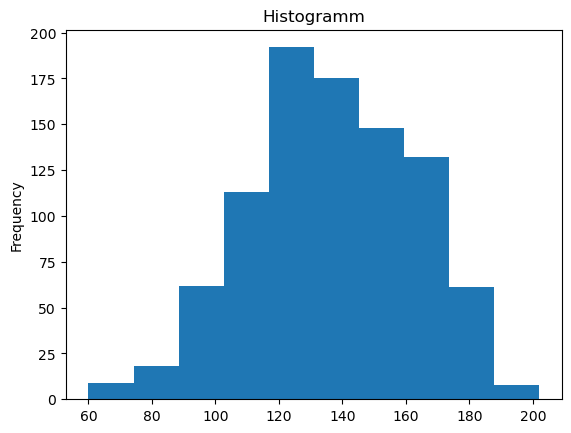

In [13]:
vec.plot.hist ( title="Histogramm" );
# Alternativ:
# import matplotlib.pyplot as plt
# plt.hist (vec)

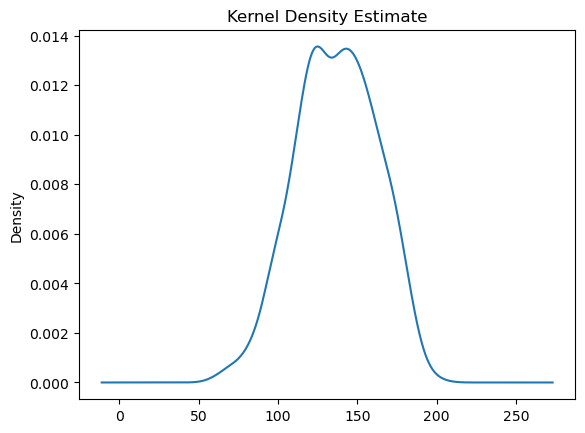

In [228]:
vec.plot.kde ( title="Kernel Density Estimate" );


<img src="VL02_Material/boxplot.png" width="80%" />

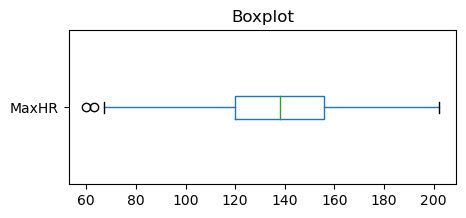

In [241]:
vec.plot.box ( title="Boxplot", vert=False, 
               figsize=(5,2) );


**Inter Quartile Range (IQR):** Die Größe des zentrierten Bereichs, der 50% der Daten beinhaltet. 
<div class="smallfont">Die Box beginnt beim 0,25-Quantil und endet beim 0,75-Quantil,<br />
    der Strich in der Mitte ist der Median.</div>

**Achtung:** Die Whisker haben nicht immer die Länge 1.5 x IQR, sondern enden am letzten Punkt in diesem Bereich.

Weitere Plot-Funktionalität wird durch Matplotlib und Seaborn angeboten:

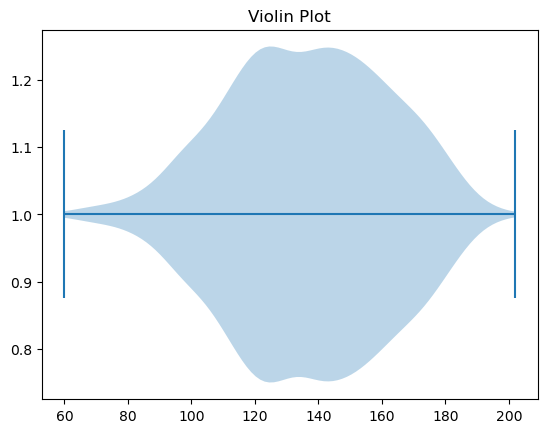

In [265]:
import matplotlib.pyplot as plt
plt.violinplot ( vec, vert=False )
plt.title( "Violin Plot");


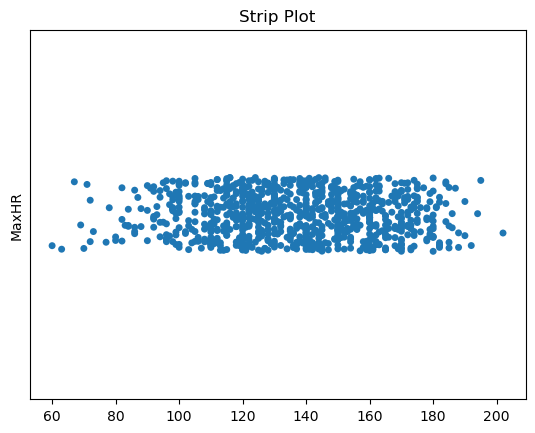

In [332]:
import seaborn as sns
sns.stripplot ( data=vec, orient="h").set(
   title="Strip Plot", ylabel="MaxHR", yticks=[] );

### 3.3 Vergleich verschiedener Subpopulationen

> Die Population oder Grundgesamtheit ist die Menge aller Individuen oder Objekte,  
über die eine Aussage getroffen werden soll. <div class="tinyfont" align="right">Göran Kauermann, Helmut Küchenhoff: Stichproben. Methoden und praktische Umsetzung mit R. 1. Auflage. Springer, Berlin Heidelberg 2011, S. 5</div>

In [48]:
# Untersuche jeden Index, ob hier die Bedingung
# "HeartDisease"==0 erfüllt ist
idx0 = df["HeartDisease"] == 0
idx0

0       True
1      False
2       True
3      False
4       True
       ...  
913    False
914    False
915    False
916    False
917     True
Name: HeartDisease, Length: 918, dtype: bool

In [49]:
# Verwende "boolean filtering", um je eine Series
# je Teilpopulation zu erhalten (~ = Verneinung)

vec_healthy = df["MaxHR"][ idx0]
vec_ill     = df["MaxHR"][~idx0]

len(vec_healthy), len(vec_ill)


(410, 508)

In [50]:
# Boolean Filtering
idx0 = df["HeartDisease"] == 0
vec_healthy = df["MaxHR"][ idx0]
vec_ill     = df["MaxHR"][~idx0]

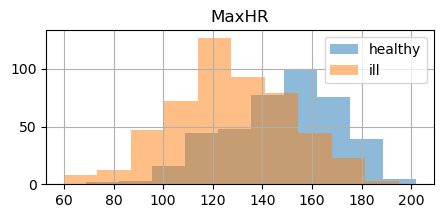

In [279]:
# Visualize
vec_healthy.hist ( alpha=0.5, label="healthy",
                   figsize=(5,2) );
vec_ill.hist ( alpha=0.5, label="ill" );
plt.legend ( );
plt.title ( "MaxHR" );
# Bingenzen können mit bins=... spezifiziert
# werden

### 3.4 Visualisierung kategorischer Größen

In [396]:
# Zähle, wie oft die einzelnen Kategorien vorkommen
df["ChestPainType"].value_counts()


ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

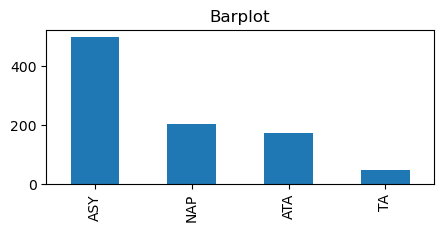

In [403]:
# ähnliche Funktionalität in matplotlib oder seaborn
df["ChestPainType"].value_counts().plot.bar(
   title="Barplot", figsize=(5,2) );


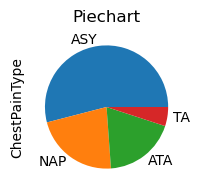

In [405]:
# ähnliche Funktionalität in matplotlib oder seaborn
df["ChestPainType"].value_counts().plot.pie(
   title="Piechart", figsize=(5,2) );


<img src="VL02_Material/piechart.jpg" width="80%" />

# <div style="color:gray">1. Grundbegriffe Data Science / Data Analytics</div>
# <div style="color:gray">2. Python-Grundlagen</div>
# <div style="color:gray">3. Einfache Visualisierungen</div>

# Vielen Dank für Ihre Aufmerksamkeit!

# Anhang

In [1]:
def rufe(name, loud=False):
    if loud:
        print(f"HALLO, {name.upper()}!")
    else:
        print(f"Hallo, {name}!")

rufe("Bob")
rufe("Fred", True)

Hallo, Bob!
HALLO, FRED!


Kann man eine Liste mit Argumenten ("positional") übergeben?

In [117]:
argumente = ["Bob", True]
rufe ( argumente )         # falsch


Hallo, ['Bob', True]!


In [118]:
rufe ( *argumente )        # richtig: Die spezielle "Asterisk"-Syntax * "entpackt" eine Liste


HALLO, BOB!


**Entpacken** von Dictionaries mit dem Asterisk-Operator:

In [185]:
# Wie war die Funktion "rufe" nochmal deklariert?
help(rufe)


Help on function rufe in module __main__:

rufe(name, loud=False)



In [189]:
# Entpacken mit dem **-Operator
d = {"loud": True, "name": "Fred"}
rufe(**d)  # äquivalent zu: rufe(loud=True, name="Fred")


HALLO, FRED!


In [340]:
# Kann auch mit dem *-Operator kombiniert werden:
rufe(*["Fred"], **{"loud":True})
# Ergebnis?

HALLO, FRED!


### 2.5 Klassen

Klassen in Python sind einfach zu definieren:

In [178]:
class Greeter:
    """Dokumentation der Klasse erfolgt über 3-fach Anführungszeichen"""

    # Constructor
    def __init__(self, name):    # self ist eine Konvention und dienst zur Referenzierung der Instanz
        self.name = name         # Instanz-Variable

    # Instanz-Methode
    def greet(self, loud=False):
        if loud:
            print(f"HELLO, {self.name.upper()}")
        else:
            print(f"Hello, {self.name}!")
    
g = Greeter("Fred")   # Erzeuge eine Instanz der Greeter-Klasse
g.greet()             # Call an instance method; prints "Hello, Fred"
g.greet(loud=True)    # Call an instance method; prints "HELLO, FRED!"


Hello, Fred!
HELLO, FRED


In [343]:
# Ruft Dokumentationsstring auf
?Greeter


In [180]:
# Ein Objekt hat standardmäßig keine "Länge"
len(g)


TypeError: object of type 'Greeter' has no len()

In [183]:
# Klassen können nachträglich verändert werden
Greeter.__len__ = lambda self: len(self.name)
h = Greeter("Fred")
len(h)


4

**Datenklassen** sind praktisch um einfach Daten abzulegen, ohne z.B. den Klassenkontruktor zu verwenden.

In [198]:
from dataclasses import dataclass

@dataclass                     # sog. "Decorator": Ein Wrapper um eine Funktion/Klasse, der deren Funktionalität erweitert
class InventoryItem:
    """Class for keeping track of an item in inventory."""

    name: str                  # Beispiele für Type Annotations, diese sind meist optional
    unit_price: float
    quantity_on_hand: int = 0  # default value

    def total_cost(self) -> float:
        return self.unit_price * self.quantity_on_hand


item = InventoryItem(name="Schrank", unit_price=120.50, quantity_on_hand=10)
print(item.total_cost())


1205.0


**Implementierung von ```str()``` und ```repr()```:**
- ```str(x)``` ruft die ```__str__```-Methode des Objekts ```x``` auf (```__<name>__``` sind sog. *Dunder-Methoden*)
- ```repr(x)``` ruft die ```__repr__```-Methode des Objekts ```x``` auf
- ```str(x)``` soll eine Menschen-lesbare Beschreibung des Objekts liefern.
- ```repr(x)``` soll eine vollständige Beschreibung liefern, mit der das Objekt neu erstellt werden kann.

In [61]:
class Person:
    def __init__(self, age):   # Konstruktor
        self.age = age         # das erste Argument "self" ist ein Platzhalter für das Objekt ("this")
    
    def __str__(self):
        return "Eine Person, die {0} Jahre alt ist".format(self.age)

    def __repr__(self):
        return "Person({0})".format(self.age)

p = Person(42)

print ( str(p)  )
print ( repr(p) )


Eine Person, die 42 Jahre alt ist
Person(42)
